In [29]:
import tensorflow
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation, Dropout
from keras.callbacks import History
from keras.utils import plot_model
from keras.backend import clear_session

from keras import optimizers

import matplotlib.pyplot as plt

''' global plotting settings '''
#plt.style.use('seaborn-paper')
# Update the matplotlib configuration parameters:
plt.rcParams.update({'text.usetex': False,
                     'lines.linewidth': 3,
                     'font.family': 'sans-serif',
                     'font.serif': 'Helvetica',
                     'font.size': 14,
                     'xtick.labelsize': 'large',
                     'ytick.labelsize': 'large',
                     'axes.labelsize': 'large',
                     'axes.titlesize': 'large',
                     'axes.grid': True,
                     'grid.alpha': 0.53,
                     'lines.markersize': 12,
                     'legend.borderpad': 0.2,
                     'legend.fancybox': True,
                     'legend.fontsize': 'medium',
                     'legend.framealpha': 0.7,
                     'legend.handletextpad': 0.1,
                     'legend.labelspacing': 0.2,
                     'legend.loc': 'best',
                     'figure.figsize': (12,8),
                     'savefig.dpi': 100,
                     'pdf.compression': 9})

"""
This jupyter notebook is based on using machine learning 
to find the maximum compression possible on magnetic data
from the 3m sodium experiment
"""

'\nThis jupyter notebook is based on using machine learning \nto find the maximum compression possible on magnetic data\nfrom the 3m sodium experiment\n'

In [2]:
""" 
this cell is for importing the data, assumed to be in the same directory as .py file
"""

  # load .data file into a pandas dataframe
filepath = "3m-data.csv"
data = pd.read_csv(filepath, header=None)

In [3]:
"""
This cell is for creating training and testing datasets
"""

  # first take a random 90% of the data, use it as our training data
train_data = data.sample(frac = 9/10, axis = 0)

  # take everything else to be our testing data
test_data = data.drop(train_data.index)
  
    
    
"""
train_in will be the input data we use to train our network
train_out will be used as the answer key for the training done on train_in
"""

train_in, train_out = train_data, train_data  # identical in/out for autoencoder

""" 
test_in will be the input parameters for seeing if our network works
test_out will be the answer key for test_in
"""

test_in, test_out = test_data, test_data    # identical in/out for autoencoder


In [23]:
""" 
making a net with several hidden layers
"""

  # initialize a linear network structure
model = Sequential()

  # add some layers
model.add(Dense(units=33, activation='relu', input_dim=33))

#model.add(Dense(units=15, activation='relu'))

model.add(Dense(units=1, activation='sigmoid'))

#model.add(Dense(units=15, activation='relu'))

model.add(Dense(units=33, activation='linear'))


  # set a custom optimizer
#thats_our_boy = optimizers.RMSprop(learning_rate=0.0008)
thats_our_boy = optimizers.Nadam(learning_rate=0.001)

  # configure learning process
model.compile(loss='mse', optimizer=thats_our_boy)

  # train model for a few epochs. x is the input, y is the target (TRAINING) data
history = model.fit(x=train_in, y=train_out, epochs=10, verbose=2, batch_size=64, validation_data=[test_in, test_out])

Train on 125282 samples, validate on 13920 samples
Epoch 1/10
 - 2s - loss: 9.8382 - val_loss: 2.5318
Epoch 2/10
 - 2s - loss: 0.7269 - val_loss: 0.0376
Epoch 3/10
 - 2s - loss: 0.0056 - val_loss: 1.2241e-04
Epoch 4/10
 - 2s - loss: 1.2003e-04 - val_loss: 1.1995e-04
Epoch 5/10
 - 2s - loss: 1.1988e-04 - val_loss: 1.1993e-04
Epoch 6/10
 - 1s - loss: 1.1991e-04 - val_loss: 1.2006e-04
Epoch 7/10
 - 1s - loss: 1.1999e-04 - val_loss: 1.2003e-04
Epoch 8/10
 - 2s - loss: 1.2012e-04 - val_loss: 1.2004e-04
Epoch 9/10
 - 2s - loss: 1.2030e-04 - val_loss: 1.2075e-04
Epoch 10/10
 - 2s - loss: 1.2045e-04 - val_loss: 1.2036e-04


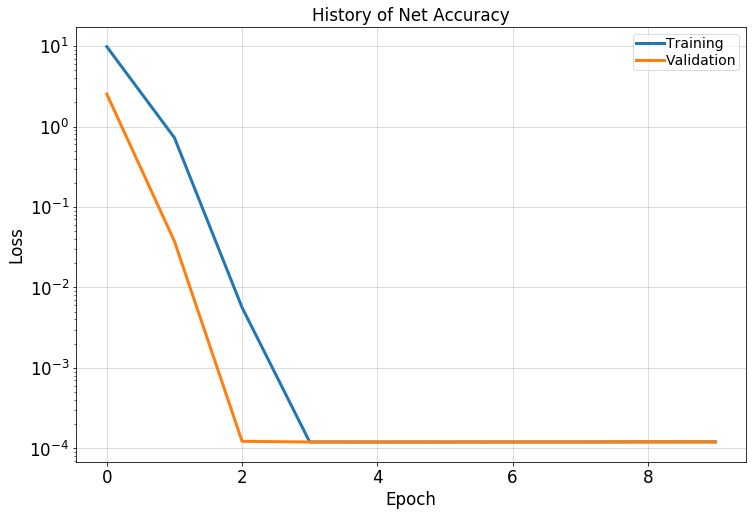

In [31]:
# evaluate performance, x is input and y is target (TESTING) data

# Plot training & validation loss values
plt.plot(history.history['loss'], label="Training")
plt.plot(history.history['val_loss'], label="Validation")

plt.yscale("log")
plt.title('History of Net Accuracy')
plt.xlabel('Epoch')
plt.ylabel("Loss")
plt.legend()
plt.savefig('HistoryofLoss')
plt.show()